In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
from fastai import *
from fastai.tabular import *

In [4]:
os.listdir('../../titanic')

['train.csv', 'gender_submission.csv', 'test.csv', 'models', 'submission.csv']

In [5]:
path = Path('../../titanic')

In [6]:
df = pd.read_csv(path/'train.csv')
df_test = pd.read_csv(path/'test.csv')

In [7]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [322]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
def_title = [i.split(',')[1].split('.')[0] for i in df.Name]
df['Title'] = def_title
df.Title.head()

def_test_title = [i.split(',')[1].split('.')[0] for i in df_test.Name]
df_test['Title'] = def_test_title
df_test.Title.head()

0      Mr
1     Mrs
2      Mr
3      Mr
4     Mrs
Name: Title, dtype: object

In [10]:
df['Embarked'] = df['Embarked'].fillna('C')
df_test['Embarked'] = df_test['Embarked'].fillna('C')

df.Fare.fillna(df.Fare.median(), inplace=True)
df_test.Fare.fillna(df_test.Fare.median(), inplace=True)

df.Cabin.fillna("N", inplace=True)
df_test.Cabin.fillna("N", inplace=True)

df.Age.fillna(df.Age.median(), inplace=True)
df_test.Age.fillna(df_test.Age.median(), inplace=True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [146]:
a =df_test['Fare'].isnull()
def getT(a):
    j=0
    for i in a:
        if(i==True):
            return j
        j+=1
p = getT(a)
print(p)
print(df_test.iloc[p])

None


TypeError: Cannot index by location index with a non-integer key

In [326]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Mr


In [12]:
dep_var = 'Survived'
cat_var = ['Pclass','Sex','Ticket','Cabin','Embarked','Title']
cont_var = ['Age','Fare','SibSp', 'Parch']
procs = [FillMissing, Categorify, Normalize]

In [13]:
test = TabularList.from_df(df_test,cat_names=cat_var, cont_names=cont_var, procs=procs,path=path)

In [14]:
train = (TabularList.from_df(df, cat_names=cat_var, cont_names=cont_var, procs=procs, path=path)
                           .split_by_idx(list(range(0,200)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [330]:
train.show_batch(1)

Pclass,Sex,Ticket,Cabin,Embarked,Title,Age,Fare,SibSp,Parch,target
3,female,365226,N,Q,Miss,-0.9165,-0.5077,-0.4610,-0.4658,0


In [15]:
learn = tabular_learner(train, layers=[200,100], metrics=accuracy, emb_drop=0.1)

In [16]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(4, 3)
    (1): Embedding(3, 3)
    (2): Embedding(553, 55)
    (3): Embedding(127, 24)
    (4): Embedding(4, 3)
    (5): Embedding(17, 8)
  )
  (emb_drop): Dropout(p=0.1)
  (bn_cont): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=100, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=200, out_features=100, bias=True)
    (4): ReLU(inplace)
    (5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [17]:
learn.lr_find(num_it=200)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


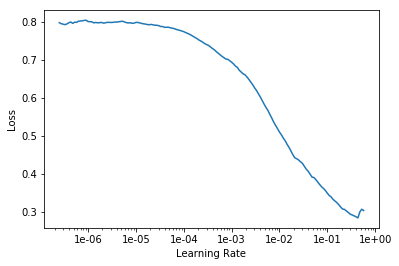

In [18]:
learn.recorder.plot()

In [19]:
learn.fit(15,slice(1e-1))

epoch,train_loss,valid_loss,accuracy,time
0,0.839350,1.033526,0.690000,00:00
1,0.639357,0.557685,0.795000,00:00
2,0.471749,0.715781,0.770000,00:00
3,0.347408,0.605099,0.830000,00:00
4,0.264273,0.638064,0.860000,00:00
5,0.215933,0.820698,0.830000,00:00
6,0.174609,0.549168,0.865000,00:00
7,0.144114,0.602404,0.845000,00:00
8,0.119138,0.606233,0.840000,00:00
9,0.100135,0.682418,0.845000,00:00


In [163]:
learn.fit_one_cycle(5,slice(1e-1))

epoch,train_loss,valid_loss,accuracy,time
0,0.021929,0.810413,0.820225,00:00
1,0.034138,1.182868,0.601124,00:00
2,0.044061,0.852218,0.825843,00:00
3,0.045459,0.973549,0.825843,00:00
4,0.041308,0.913901,0.825843,00:00


In [174]:
learn.fit_one_cycle(10,max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.279400,0.614708,0.735955,00:00
1,0.278530,0.575989,0.758427,00:00
2,0.281360,0.574954,0.764045,00:00
3,0.286099,0.583891,0.747191,00:00
4,0.288561,0.625110,0.752809,00:00
5,0.283867,0.627228,0.747191,00:00
6,0.281177,0.672758,0.752809,00:00
7,0.272348,0.588499,0.747191,00:00
8,0.264398,0.588436,0.752809,00:00
9,0.257458,0.589361,0.752809,00:00


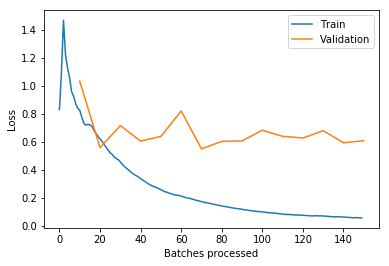

In [20]:
learn.recorder.plot_losses()

In [337]:
learn.save('titanic-learned-model-nikkisharma-drop0.1-slice-200-100-Title-kaggle')

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

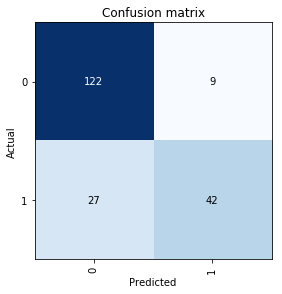

In [22]:
interp.plot_confusion_matrix()

In [213]:
val_preds, val_targets = learn.get_preds()

In [214]:
val_labels = np.argmax(val_preds,1)

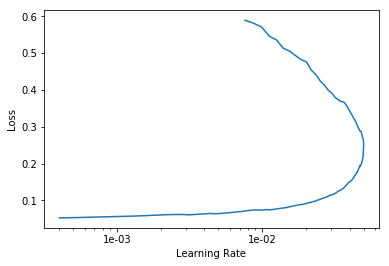

In [215]:
learn.recorder.plot()

In [328]:
learn.predict(df_test.iloc[0])

(Category 0, tensor(0), tensor([0.8313, 0.1687]))

In [340]:
test_preds,_ = learn.get_preds(DatasetType.Test)

In [341]:
t_p = test_preds


In [342]:
test_survived = np.argmax(t_p,1)
test_values = test_survived.numpy()

In [320]:
test_survived = t_p[:,0] < t_p[:,1]
test_values = test_survived.numpy()

In [343]:
test_values.shape

(418,)

In [344]:
np.sum(test_values)

172

In [345]:
submission = pd.read_csv(path/'gender_submission.csv')

In [346]:
base_survived = submission['Survived']
base_values = base_survived.values
np.sum(base_values)
base_values.shape

(418,)

In [347]:
result = test_values == base_values
correct = np.sum(result)

In [348]:
total = result.shape[0]

In [349]:
accuracy = correct/total
accuracy

0.8947368421052632

In [63]:
test_values

array([0, 1, 0, 0, ..., 0, 0, 0, 0])

In [64]:
base_values

array([0, 1, 0, 0, ..., 1, 0, 0, 0])

In [120]:
test_ids = df_test.PassengerId

In [350]:
df_sub = pd.Series(test_ids)
df_sub = pd.DataFrame({'PassengerId':test_ids, 'Survived':test_values})

In [68]:
df_sub = df_test

In [69]:
df_sub = df_sub.drop(['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'], axis=1)

In [70]:
df_sub['Survived'] = test_values

In [351]:
df_sub.to_csv(path/"submission.csv",index=False)

In [140]:
np.exp(test_preds[0].data).numpy()

array([[2.55959 , 1.061999],
       [1.637114, 1.66041 ],
       [2.570811, 1.057364],
       [2.568615, 1.058267],
       ...,
       [1.090705, 2.492224],
       [2.653884, 1.024265],
       [2.512312, 1.081984],
       [2.067919, 1.314501]], dtype=float32)

In [119]:
train = (TabularList.from_df(df, cat_names=cat_var, cont_names=cont_var, procs=procs, path=path)
                           .split_none()
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [120]:
learn = tabular_learner(train, layers=[200,100], metrics=accuracy)

In [121]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


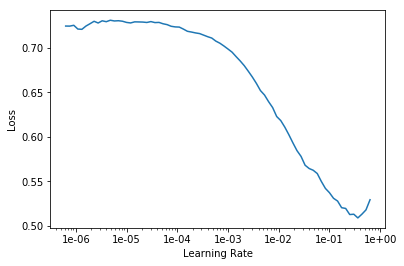

In [122]:
learn.recorder.plot()

In [123]:
learn.fit_one_cycle(8,max_lr=1e-2)